<a href="https://colab.research.google.com/github/gborn/Whatsapp_Chat_Analysis/blob/main/notebooks/02_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=False, dpi=100)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

sns.set()

In [10]:
chats = pd.read_csv('group_chats.csv', parse_dates=['datetime'])
chats

,datetime,id,message
0,2021-10-05 11:16:00,Udaya,hi
1,2021-10-05 11:30:00,Udaya,Has anyone completed transfer learning assignm...
2,2021-10-05 11:30:00,Krishna,hi all
3,2021-10-05 16:11:00,Mahendra,<Media omitted>
4,2021-10-05 16:13:00,Sherya,df.age.isna() or df.age.isnull()
...,...,...,...
6315,2021-11-12 21:50:00,Raghvendra,Very nice article. 👏👏👏
6316,2021-11-12 23:44:00,Rohit,Anyone who is appearing or appeared for interv...
6317,2021-12-12 17:22:00,Sherya,Guys please anyone can share sample resume on ...
6318,2021-12-12 17:25:00,Ashish,Thank you :)


In [11]:
unique_users_to_message = chats.groupby(['id'], as_index=False)['message'].apply(' '.join)
unique_users_to_message.head(10)

,id,message
0,Aadesh,Yes It would not be same Once Google the error...
1,Aarav,Great job bro Congrats bro
2,Abhi,<Media omitted> Got them tq Thanks 👍 Yes Nice ...
3,Abhimanyu,<Media omitted> <Media omitted> 👍 👍
4,Abhinav,Eda assignment is mostly to see how you can ab...
5,Adarsh,"I got that email, completed only 2 assignments..."
6,Akshath,"Broadcasting, adding new dimension so it can g..."
7,Aman,i am new too. 😎 Hi Pulkit 👍 bro i am having pr...
8,Ambika,+1 Not 2021 but I am from 2020 batch Yes 🙌 Isn...
9,Aniket,Along with cuda makesure you have correct vers...


In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sentiment_analyzer = SentimentIntensityAnalyzer()

unique_users_to_message['message'].apply(sentiment_analyzer.polarity_scores)
sentiment_analyzer.polarity_scores(unique_users_to_message['message'][0])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'compound': 0.9975, 'neg': 0.047, 'neu': 0.819, 'pos': 0.134}

In [14]:
import re
from bs4 import BeautifulSoup
from nltk.stem.wordnet import WordNetLemmatizer

wnl = WordNetLemmatizer()
nltk.download('wordnet')

# list of custom stopwords
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def preprocess_text(sentence:str):

    #a. remove html and url tags from text
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()

    #b.expand contracted terms
    sentence = decontracted(sentence)

    #c.remove non aplhabet characters
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)

    #d. lemmatize each word in sentence
    #e. and turn them into lower case
    #list of stop words: https://gist.github.com/sebleier/554280
    sentence = ' '.join(wnl.lemmatize(word.lower()) for word in sentence.
    split() if word.lower() not in stopwords)
    
    return sentence


unique_users_to_message['message'] = unique_users_to_message['message'].apply(preprocess_text)
unique_users_to_message

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,message
0,Aadesh,yes would not google error might get close sol...
1,Aarav,great job bro congrats bro
2,Abhi,got tq thanks yes nice bro hai eda haberman da...
3,Abhimanyu,
4,Abhinav,eda assignment mostly see able get insight giv...
...,...,...
131,Vijay,great work congratulation brother
132,Vinay,thanks sharing good monthly exam happening ohh...
133,Virat,thankyou also completed module module hoping n...
134,Vivek,guy topic question need suggestion brother wan...


In [18]:
!pip install top2vec > /dev/null
from top2vec import Top2Vec
model = Top2Vec(documents=unique_users_to_message['message'].tolist(), speed="learn", workers=4)
model.get_num_topics()

2021-12-19 16:12:45,739 - top2vec - INFO - Pre-processing documents for training
2021-12-19 16:12:45,808 - top2vec - INFO - Creating joint document/word embedding
2021-12-19 16:12:46,410 - top2vec - INFO - Creating lower dimension embedding of documents
2021-12-19 16:12:53,046 - top2vec - INFO - Finding dense areas of documents
2021-12-19 16:12:53,062 - top2vec - INFO - Finding topics


2

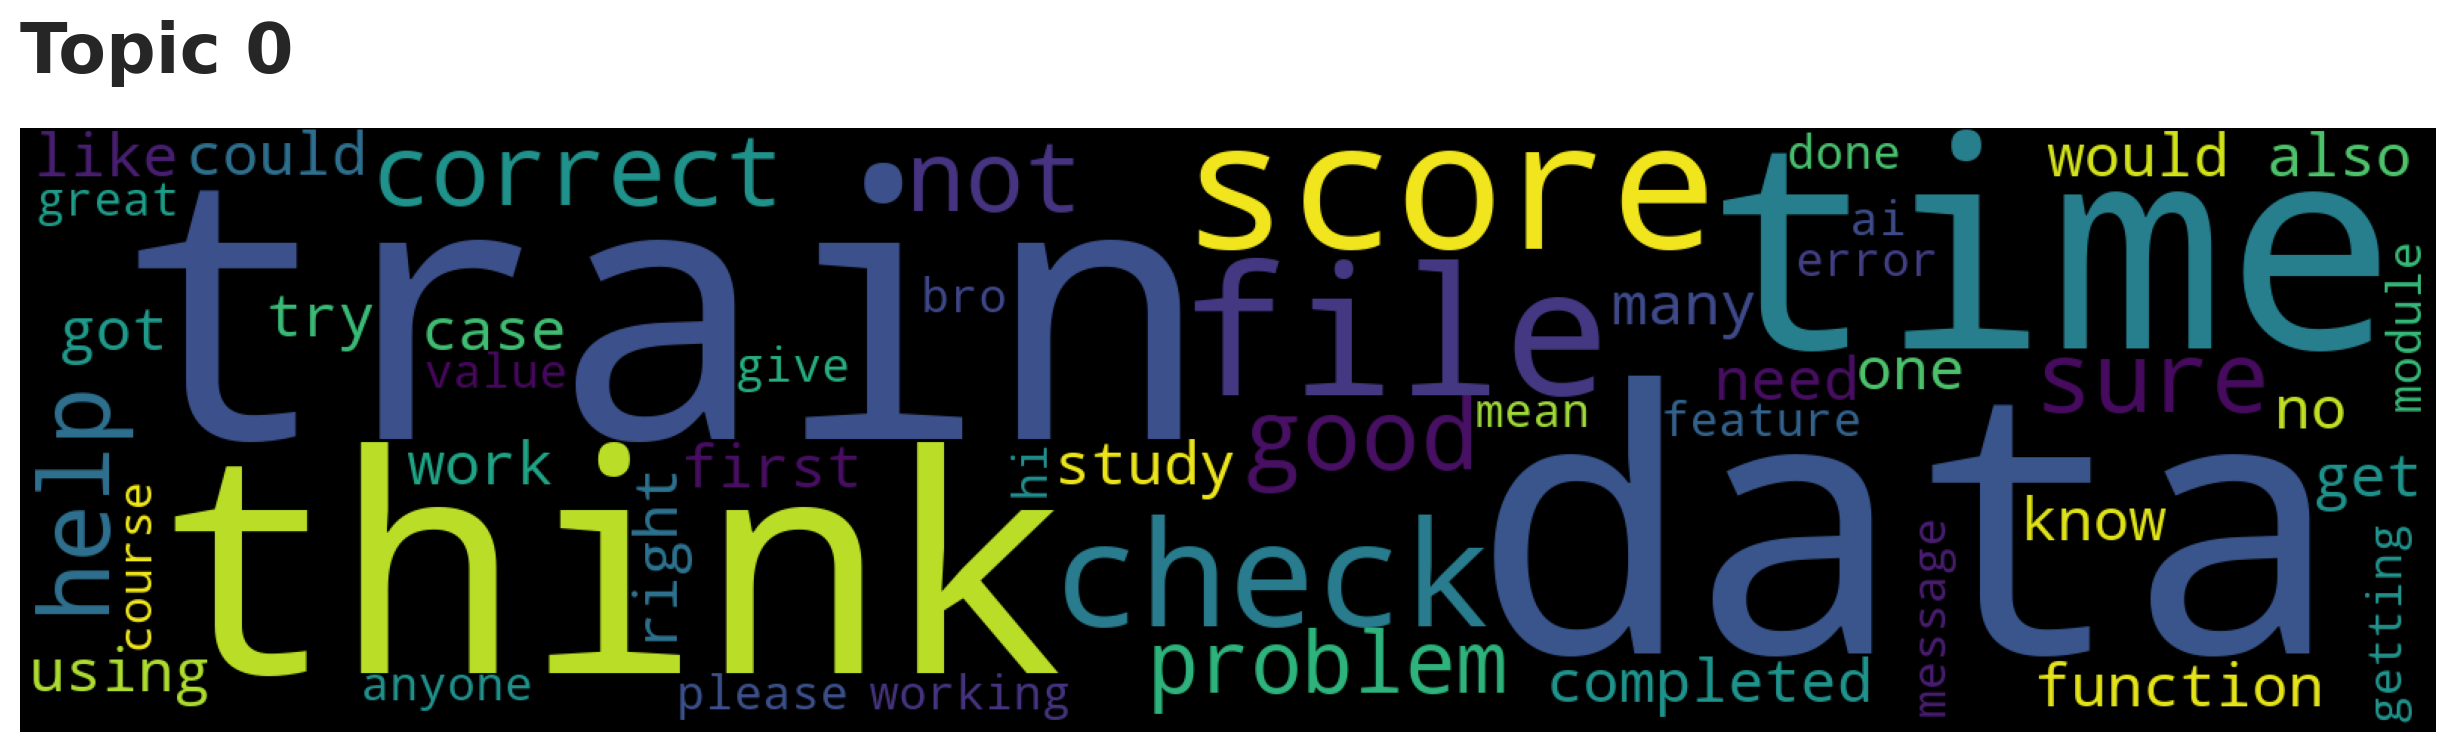

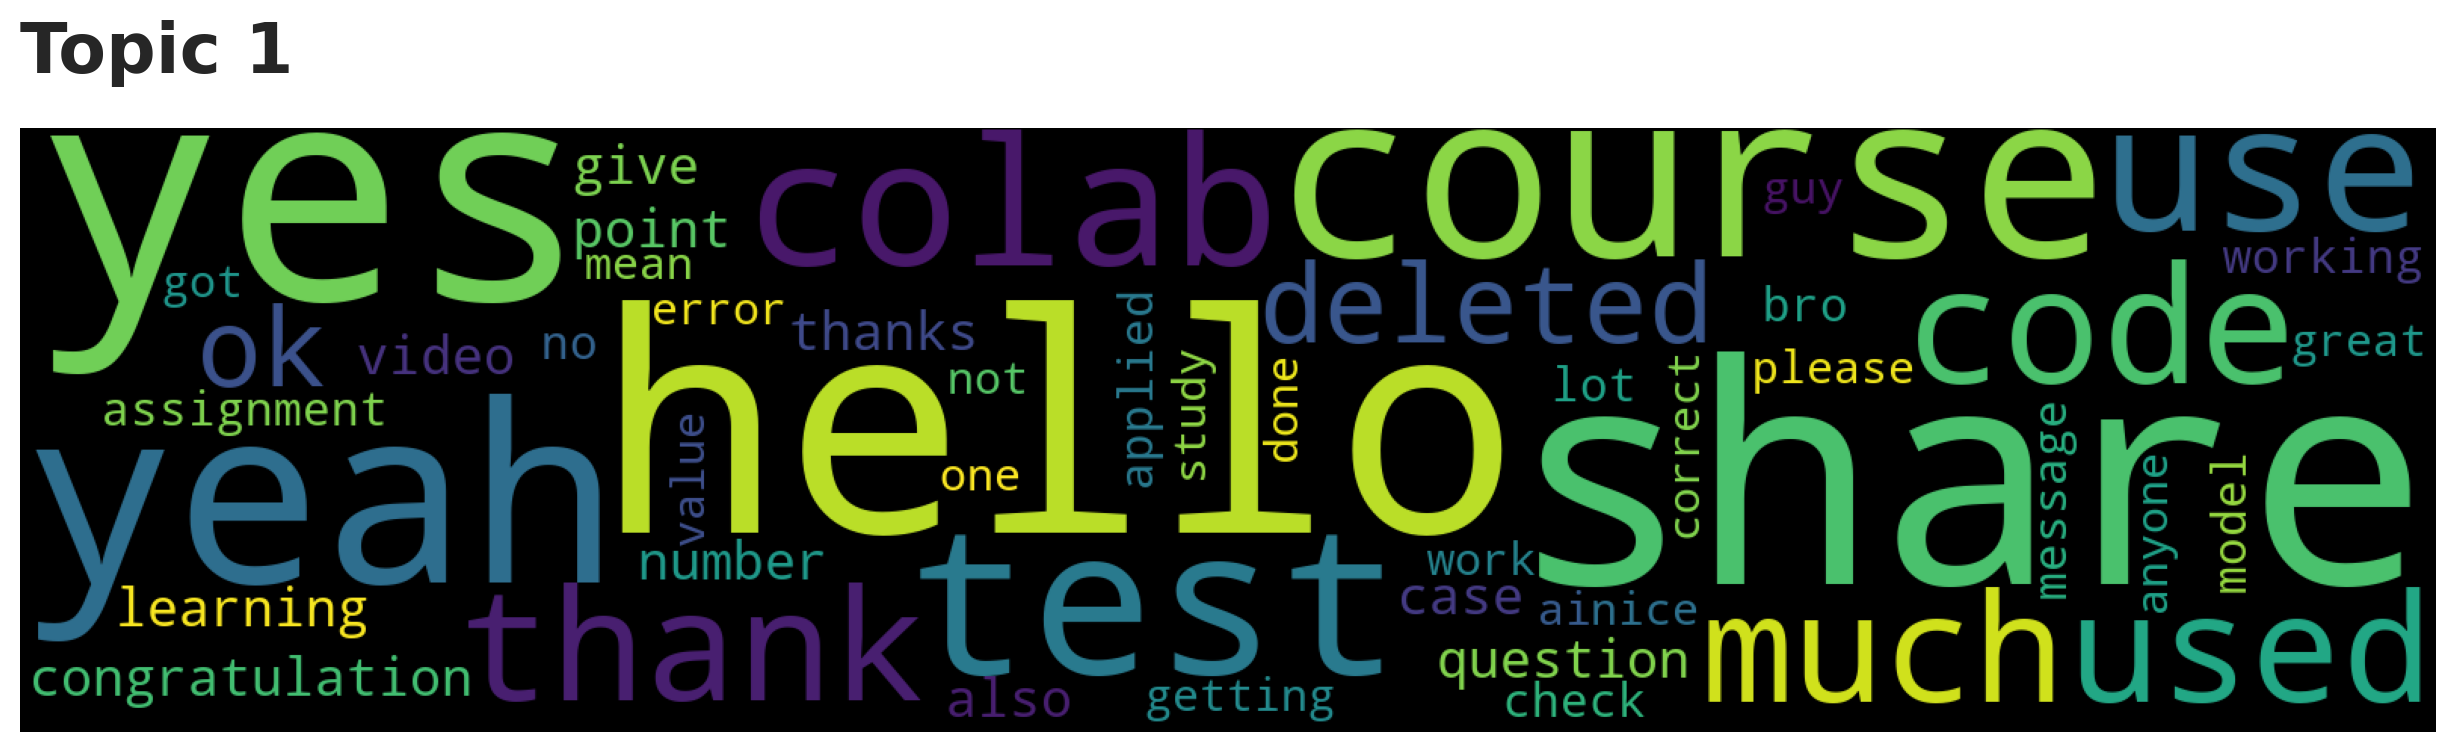

In [19]:
topic_words, word_scores, topic_nums = model.get_topics(model.get_num_topics())
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)